In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import os
import warnings
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Abaikan peringatan NumPy
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [31]:
X_test = pd.read_csv('../../Data/fix/X_test.csv')
y_test = np.loadtxt("../../Data/fix/y_test.csv", delimiter=",")

In [32]:
# Load scalers
minmax = joblib.load("../../Models/Default/minmax.pkl")
pt = joblib.load("../../Models/Default/powertransformer.pkl")

In [33]:
X_minmax_scaled = minmax.transform(X_test)
X_pt_scaled = pt.transform(X_test)

In [34]:
# Directory model
model_dir = "../../Models/Default/"

In [35]:
# Daftar model
test_models = ["LGBM", "ETC", "SVM", "GNB", "CATBOOST"]

In [ ]:
test_result = []

print("Test Models...\n")
for model_name in test_models:
    model_path = os.path.join(model_dir, f"MODEL-{model_name}.pkl")

    if not os.path.exists(model_path):
        print(f"Model {model_name} not found, skipping...\n")
        continue

    print(f"Testing {model_name}...")
    model = joblib.load(model_path)


    # Perform prediction
    if model_name == "SVM":
        y_pred = model.predict(X_minmax_scaled)
    elif model_name == "GNB":
        y_pred = model.predict(X_pt_scaled)
    else:
        y_pred = model.predict(X_test)

    # Compute Metrics
    accuracy = accuracy_score(y_test, y_pred) * 100
    precision = precision_score(y_test, y_pred, zero_division=0) * 100
    recall = recall_score(y_test, y_pred, zero_division=0) * 100
    f1 = f1_score(y_test, y_pred, zero_division=0) * 100

    # Tampilkan metrik di konsol
    print(f"Accuracy: {accuracy:.2f}%, Precision: {precision:.2f}%, Recall: {recall:.2f}%, F1: {f1:.2f}%")

    # Store test_result
    test_result.append([model_name, accuracy, precision, recall, f1])
    print(f"{model_name} testing completed.\n")

Test Models...

Testing LGBM...
Accuracy: 99.34%, Precision: 98.82%, Recall: 98.13%, F1: 98.47%
LGBM evaluation completed.

Testing ETC...
Accuracy: 99.24%, Precision: 98.58%, Recall: 97.89%, F1: 98.24%
ETC evaluation completed.

Testing SVM...
Accuracy: 98.93%, Precision: 97.43%, Recall: 97.66%, F1: 97.54%
SVM evaluation completed.

Testing GNB...
Accuracy: 89.18%, Precision: 67.09%, Recall: 98.36%, F1: 79.77%
GNB evaluation completed.

Testing CATBOOST...
Accuracy: 99.34%, Precision: 98.59%, Recall: 98.36%, F1: 98.48%
CATBOOST evaluation completed.



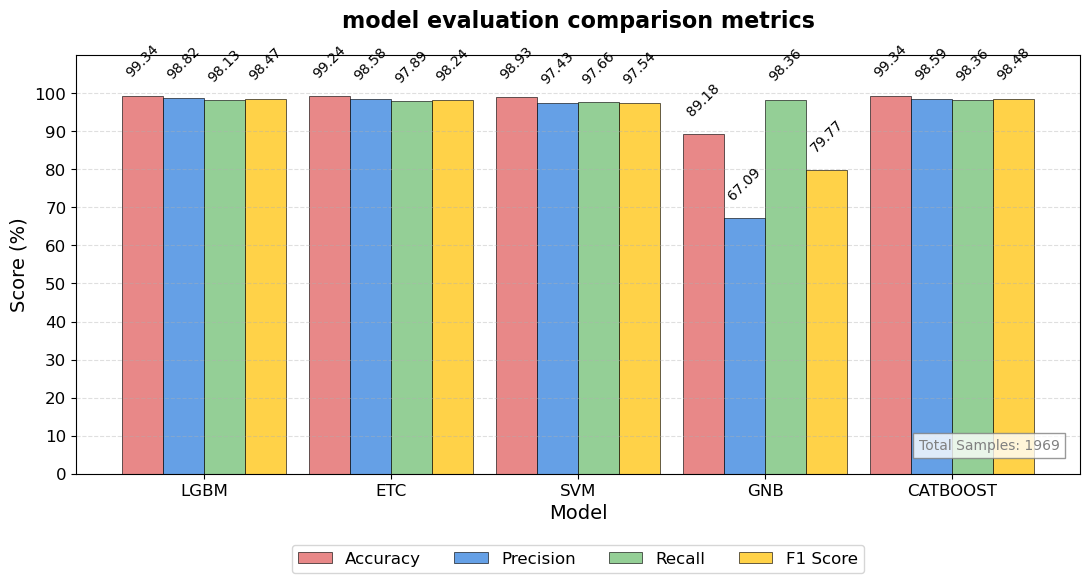

In [39]:
#  Membuat DataFrame dari list results
results_df = pd.DataFrame(test_result, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])

# Variabel untuk plotting
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
models = results_df["Model"]
n_metrics = len(metrics)
n_models = len(models)

# Siapkan posisi bar
x = np.arange(n_models)
width = 0.22  # Lebar bar

# Buat figure
fig, ax = plt.subplots(figsize=(11, 6))

# Plot bar untuk setiap metrik
colors = ['#E57373', '#4A90E2', '#81C784', '#FFCA28']  # Red, blue, green, yellow (lembut)
for i, metric in enumerate(metrics):
    ax.bar(x + i * width, results_df[metric], width, label=metric,
           color=colors[i], alpha=0.85, edgecolor='black', linewidth=0.5)

# Kustomisasi plot
ax.set_title('model evaluation comparison metrics', fontsize=16, pad=20, weight='bold')
ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('Score (%)', fontsize=14)
ax.set_xticks(x + width * (n_metrics - 1) / 2)
ax.set_xticklabels(models, fontsize=12)
ax.set_yticks(np.arange(0, 101, 10))
ax.set_yticklabels(np.arange(0, 101, 10), fontsize=12)
ax.legend(fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
ax.grid(True, axis='y', linestyle='--', alpha=0.4)
ax.set_ylim(0, 110)

# Tambahkan angka di atas bar
for i, metric in enumerate(metrics):
    for j, value in enumerate(results_df[metric]):
        ax.text(j + i * width, value + 5, f'{value:.2f}',
                ha='center', fontsize=10, color='black', weight='medium', rotation=45)

# Tambahkan anotasi total sampel di kanan bawah
ax.text(0.98, 0.05, f'Total Samples: {len(y_test)}',
        transform=ax.transAxes, fontsize=10, color='gray',
        ha='right', va='bottom', bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

plt.tight_layout()
# plt.savefig("../picture/Eval_Tuning_Params/EVAL_METRIKS/model_performance.png", dpi=300, bbox_inches='tight')
plt.show()

# print("\nVisualisasi telah disimpan di '../picture/Feature_Selection/'")